# Laboratorio de datos

## Guía de ejercicios 2

### Paquetes

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Dataset

In [110]:
Espacios = 'arbolado-en-espacios-verdes.csv'

df_Espacios = pd.read_csv(Espacios, index_col = 2)

In [111]:
df_Veredas = pd.read_csv('arbolado-publico-lineal-2017-2018.csv')

C:\Users\tomas\AppData\Local\Temp\ipykernel_13144\2890767425.py:1: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Veredas = pd.read_csv('arbolado-publico-lineal-2017-2018.csv')


### Ejercicios

#### Ejercicio 1.

1. Definir una función leer_parque(nombre_archivo, parque) que abra el archivo indicado y devuelva una lista de diccionarios con la información del parque especificado. La lista debe tener un diccionario por cada árbol del parque elegido. Dicho diccionario debe tener los datos correspondientes a un árbol (recordar que cada fila del csv corresponde a un árbol). Probar la función en el parque ‘GENERAL PAZ’ y debería dar una lista con 690 árboles. 

In [112]:
def leer_parque(Archivo, Parque):
    df = pd.read_csv(Archivo, index_col = 2)
    Columna = 'espacio_ve'
    Lista = []
    
    for i in range(1,len(df[Columna])):
        
        if df.iloc[i][Columna] == Parque:
            
            Arbol_Parque = {
                'Nombre' : df.iloc[i]['nombre_com'],
                'Especie' : df.iloc[i]['nombre_cie'],
                'Género' : df.iloc[i]['nombre_fam'],
                'Familia' : df.iloc[i]['nombre_gen'],
                'Tipo de follaje' : df.iloc[i]['tipo_folla'],
                'Origen' : df.iloc[i]['origen'],
                'Coordenada X' : df.iloc[i]['coord_x'],
                'Coordenada Y' : df.iloc[i]['coord_y'],
                'Altura' : df.iloc[i]['altura_tot'],
                'Diámetro' : df.iloc[i]['diametro'],
                'Inclinación' : df.iloc[i]['inclinacio']
            }
            
            Lista.append(Arbol_Parque)

    return Lista

Arboles_General_Paz = leer_parque(Espacios, 'GENERAL PAZ')

print(Arboles_General_Paz[1])

{'Nombre': 'Eucalipto', 'Especie': 'Eucalyptus sp.', 'Género': 'Mirtáceas', 'Familia': 'Eucalyptus', 'Tipo de follaje': 'Árbol Latifoliado Perenne', 'Origen': 'Exótico', 'Coordenada X': 96161.310446, 'Coordenada Y': 106840.291945, 'Altura': 20, 'Diámetro': 31, 'Inclinación': 0}


#### Ejercicio 2.

2. Escribir una función especies(lista_arboles) que tome una lista de árboles como la generada en el ejercicio anterior y devuelva el conjunto de especies (la columna 'nombre_com' del archivo) que figuran en la lista. 

In [113]:
def especies(lista_arboles):

    Lista = lista_arboles
    Especies = []

    for Arbol in Lista:
        if Arbol['Nombre'] in Especies:
            None
        else:
            Especies.append(Arbol['Nombre'])

    return Especies

Especies_General_Paz = especies(Arboles_General_Paz)

Especies_General_Paz

['Eucalipto',
 'Cedro de San Juan',
 'Chamaecyparis',
 'Cedro',
 'Ciprés',
 'Fenix',
 'Ciprés leylandi',
 'Fresno americano',
 'Álamo negro',
 'Palo borracho rosado',
 'Jacarandá',
 'Plátano',
 'Casuarina',
 'Acacia blanca',
 'Ombú',
 'Caqui',
 'Pindó',
 'Morera blanca',
 'Washingtonia',
 'Cedro del Himalaya',
 'Lapacho rosado',
 'Pino carrasco (Pino de Jerusalén)',
 'Falso Guayabo (Guayaba del Brasil)',
 'Acacia negra',
 'Olivo oloroso',
 'Cedro del Atlas (Cedro plateado o Cedro atlántico)',
 'Magnolia',
 'Tipa blanca',
 'Roble americano',
 'Ginkgo',
 'Tuya oriental',
 'Olivo',
 'Ceibo',
 'Pino de las canarias',
 'Bunya-bunya (Araucaria de Bidwill)',
 'Washingtonia (Palmera washingtonia)',
 'Árbol del cielo (Ailanto o Árbol de los dioses)',
 'Pino',
 'Palmito',
 'Visco (Viscote, Arca)',
 'Ciprés blanco',
 'Ficus',
 'Arce negundo',
 'Corona de cristo',
 'Níspero japonés',
 'Sauce eléctrico',
 'Paraíso',
 'No Determinado',
 'Tuja',
 'Timbó (Oreja de negro)',
 'Alcanforero',
 'Cedro del 

#### Ejercicio 3.

3. Escribir una función contar_ejemplares(lista_arboles) que, dada una lista como la generada con leer_parque(...), devuelva un diccionario en el que las especies sean las claves y tengan como valores asociados la cantidad de ejemplares en esa especie en la lista dada. Debería verse que en el parque General Paz hay 20 Jacarandás, en el Parque Los Andes hay 3 Tilos y en Parque Centenario hay 1 Laurel. .

In [114]:
def contar_ejemplares(Lista_Arboles):
    Lista_Especies = especies(Lista_Arboles)
    Diccionario = {}

    for Especie in Lista_Especies:
        Contador = 0
        
        for Arbol in Lista_Arboles:
            if Arbol['Nombre'] == Especie:
                Contador += 1
            
        Diccionario[Especie] = Contador

    return Diccionario

Ejemplares_General_Paz = contar_ejemplares(Arboles_General_Paz)

Ejemplares_General_Paz

{'Eucalipto': 49,
 'Cedro de San Juan': 1,
 'Chamaecyparis': 1,
 'Cedro': 6,
 'Ciprés': 33,
 'Fenix': 40,
 'Ciprés leylandi': 1,
 'Fresno americano': 19,
 'Álamo negro': 3,
 'Palo borracho rosado': 44,
 'Jacarandá': 20,
 'Plátano': 31,
 'Casuarina': 97,
 'Acacia blanca': 10,
 'Ombú': 8,
 'Caqui': 8,
 'Pindó': 5,
 'Morera blanca': 22,
 'Washingtonia': 13,
 'Cedro del Himalaya': 22,
 'Lapacho rosado': 4,
 'Pino carrasco (Pino de Jerusalén)': 11,
 'Falso Guayabo (Guayaba del Brasil)': 4,
 'Acacia negra': 4,
 'Olivo oloroso': 1,
 'Cedro del Atlas (Cedro plateado o Cedro atlántico)': 2,
 'Magnolia': 9,
 'Tipa blanca': 54,
 'Roble americano': 1,
 'Ginkgo': 6,
 'Tuya oriental': 2,
 'Olivo': 6,
 'Ceibo': 5,
 'Pino de las canarias': 6,
 'Bunya-bunya (Araucaria de Bidwill)': 12,
 'Washingtonia (Palmera washingtonia)': 12,
 'Árbol del cielo (Ailanto o Árbol de los dioses)': 1,
 'Pino': 7,
 'Palmito': 1,
 'Visco (Viscote, Arca)': 2,
 'Ciprés blanco': 5,
 'Ficus': 2,
 'Arce negundo': 16,
 'Corona d

#### Ejercicio 4.

4. Escribir una función obtener_alturas(lista_arboles, especie) que, dada una lista como la generada con leer_parque(...) y una especie de árbol (un valor de la columna 'nombre_com' del archivo), devuelva una lista con las alturas (columna 'altura_tot') de los ejemplares de esa especie en la lista. Observación: Conviene devolver las alturas como números (de punto flotante) y no como cadenas de caracteres. Sugerimos hacer esto modificando leer_parque(...) o modificando el tipo del valor antes de utilizarlo. Usar la función para calcular la altura promedio y altura máxima de los 'Jacarandá' en los tres parques mencionados. Debería obtenerse esto:

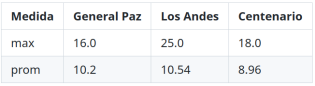

In [115]:
def obtener_alturas(Lista_Arboles, Especie):

    Columna_Alturas = 'altura_tot'
    Lista_Alturas = []

    for Arbol in Lista_Arboles:
        if Arbol['Nombre'] == Especie:
            Altura = Arbol['Altura']
            Lista_Alturas.append(Altura)

    Promedio = np.array(Lista_Alturas).mean()
    Altura_Maxima = np.array(Lista_Alturas).max()

    # Vacío.
    Indices = ['Maxima', 'Promedio']
    Columnas = ['Valor']
    df = pd.DataFrame(index = Indices, columns = Columnas)

    # Agregar una nueva columna con datos.
    df['Valor'] = [Altura_Maxima, Promedio]
    
    return df
    
Alturas_General_Paz = obtener_alturas(Arboles_General_Paz, 'Jacarandá')

Alturas_General_Paz

,Valor
Maxima,16.0
Promedio,10.2


#### Ejercicio 5.

5. Escribir una función obtener_inclinaciones(lista_arboles, especie) que, dada una lista como la generada con leer_parque(...) y una especie de árbol, devuelva una lista con las inclinaciones (columna 'inclinacio') de los ejemplares de esa especie.'}.

In [116]:
def obtener_inclinaciones(Lista_Arboles, Especie):
    Columna_Inclinaciones = 'inclinacio'
    Lista_Inclinaciones = []

    for Arbol in Lista_Arboles:
        if Arbol['Nombre'] == Especie:
            Inclinacion = Arbol['Inclinación']
            Lista_Inclinaciones.append(Inclinacion)
            
    return Lista_Inclinaciones

Inclinaciones_General_Paz = obtener_inclinaciones(Arboles_General_Paz, 'Eucalipto')

#### Ejercicio 6.

6. Combinando la función especies() con obtener_inclinaciones() escribir una función especimen_mas_inclinado(lista_arboles) que, dada una lista de árboles devuelva la especie que tiene el ejemplar más inclinado y su inclinación. Correrlo para los tres parques mencionados anteriormente. Debería obtenerse, por ejemplo, que en el Parque Centenario hay un Falso Guayabo inclinado 80 grados.

In [117]:
def especimen_mas_inclinado(Lista_Arboles):
    Lista_Especies = especies(Lista_Arboles)
    Maxima_Inclinacion = 0
    Especie_Mas_Inclinada = ''
    
    for i in range (0, len(Lista_Especies)):
        Inclinaciones = obtener_inclinaciones(Lista_Arboles, Lista_Especies[i])
        Maxima_Inclinacion_Arbol = np.array(Inclinaciones).max()

        if Maxima_Inclinacion_Arbol >= Maxima_Inclinacion:
            Maxima_Inclinacion = Maxima_Inclinacion_Arbol
            Especie_Mas_Inclinada = Lista_Especies[i]

    return Maxima_Inclinacion, Especie_Mas_Inclinada


especimen_mas_inclinado(leer_parque(Espacios, 'CENTENARIO'))    

(80, 'Falso Guayabo (Guayaba del Brasil)')

#### Ejercicio 7.

7. Volver a combinar las funciones anteriores para escribir la función especie_promedio_mas_inclinada(lista_arboles) que, dada una lista de árboles devuelva la especie que en promedio tiene la mayor inclinación y el promedio calculado. Resultados. Debería obtenerse, por ejemplo, que los Álamos Plateados del Parque Los Andes tiene un promedio de inclinación de 25 grados. 

In [118]:
def especie_promedio_mas_inclinada(Lista_Arboles):
    Lista_Especies = especies(Lista_Arboles)
    Maximo_Promedio_Inclinacion = 0
    Especie_En_Promedio_Mas_Inclinada = ''
    
    for i in range (0, len(Lista_Especies)):
        Inclinaciones = obtener_inclinaciones(Lista_Arboles, Lista_Especies[i])
        Promedio_Inclinaciones_Arbol = np.array(Inclinaciones).mean()

        if Promedio_Inclinaciones_Arbol >= Maximo_Promedio_Inclinacion:
            Maximo_Promedio_Inclinacion = Promedio_Inclinaciones_Arbol
            Especie_En_Promedio_Mas_Inclinada = Lista_Especies[i]

    return Maximo_Promedio_Inclinacion, Especie_En_Promedio_Mas_Inclinada

especie_promedio_mas_inclinada(leer_parque(Espacios, 'ANDES, LOS'))  

(25.0, 'Álamo plateado')

#### Ejercicio 8.

Vamos a trabajar ahora también con el archivo de árboles en veredas. Queremos estudiar si hay diferencias entre los ejemplares de una misma especie según si crecen en un un parque o en la vereda. Para eso tendremos que juntar datos de dos bases de datos diferentes. Explorar el dataset nuevo de árboles en veredas. Armar un DataFrame data_arboles_veredas que tenga solamente las siguiente columnas: 'nombre_cientifico', 'ancho_acera', 'diametro_altura_pecho', 'altura_arbol' Sugerimos trabajar al menos con las siguientes especies seleccionadas: especies_seleccionadas = ['Tilia x moltkei', 'Jacaranda mimosifolia', 'Tipuana tipu'] 
Advertencia: El GCBA usa distintos nombres para especie, altura y diámetro según el dataset, por ejemplo 'altura_tot' en uno y 'altura_arbol' en otro. Los nombres científicos varían de un dataset al otro. Por ejemplo 'Tipuana Tipu' se transforma en 'Tipuana tipu'. Proponemos los siguientes pasos para comparar los diámetros a la altura del pecho de las tipas en ambos tipos de entornos. 

8. Para cada dataset, armar otro seleccionando solamente las filas correspondientes a las tipas (llamalos df_tipas_parques y df_tipas_veredas, respectivamente) y las columnas correspondientes al diámetro a la altura del pecho y alturas. Usar como copias (usando .copy()) para poder trabajar en estos nuevos dataframes sin modificar los dataframes grandes originales. Renombrar las columnas necesarias para que se llamen igual en ambos dataframes.

In [119]:
# Dataframe de parques.
df_tipas_parques = df_Espacios.copy()

# Filtrar columnas.
Columnas = ['nombre_cie', 'diametro', 'altura_tot']
df_tipas_parques = df_tipas_parques[Columnas]

# Filtrar filas.
Especies = ['Tipuana Tipu']
df_tipas_parques = df_tipas_parques[df_tipas_parques['nombre_cie'].isin(Especies)]

# Renombrar columnas usando rename()
df_tipas_parques = df_tipas_parques.rename(columns={'nombre_cie': 'Nombre', 'diametro': 'Diametro', 'altura_tot': 'Altura'})

df_tipas_parques

,Nombre,Diametro,Altura
id_arbol,,,
2190,Tipuana Tipu,40,25
2191,Tipuana Tipu,40,25
2192,Tipuana Tipu,40,25
2193,Tipuana Tipu,40,25
2194,Tipuana Tipu,40,25
...,...,...,...
51655,Tipuana Tipu,87,20
51656,Tipuana Tipu,75,20
51657,Tipuana Tipu,53,20


In [120]:
# Dataframe de veredas.
df_tipas_veredas = df_Veredas.copy()

# Filtrar columnas.
Columnas = ['nombre_cientifico', 'diametro_altura_pecho', 'altura_arbol']
df_tipas_veredas = df_tipas_veredas[Columnas]

# Filtrar filas.
Especies = ['Tipuana tipu']
df_tipas_veredas = df_tipas_veredas[df_tipas_veredas['nombre_cientifico'].isin(Especies)]

# Renombrar columnas usando rename()
df_tipas_veredas = df_tipas_veredas.rename(columns={'nombre_cientifico': 'Nombre', 'diametro_altura_pecho': 'Diametro', 'altura_arbol': 'Altura'})

df_tipas_veredas

,Nombre,Diametro,Altura
0,Tipuana tipu,88.0,34.0
434,Tipuana tipu,108.0,17.0
435,Tipuana tipu,80.0,16.0
437,Tipuana tipu,107.0,25.0
438,Tipuana tipu,80.0,22.0
...,...,...,...
370059,Tipuana tipu,13.0,5.0
370169,Tipuana tipu,62.0,16.0
370170,Tipuana tipu,76.0,16.0
370171,Tipuana tipu,57.0,16.0


#### Ejercicio 9.

9. Agregar a cada dataframe (df_tipas_parques y df_tipas_veredas) una columna llamada 'ambiente' que en un caso valga siempre 'parque' y en el otro caso 'vereda'.

In [121]:
df_tipas_parques['Ambiente'] = 'Parque'
df_tipas_veredas['Ambiente'] = 'Vereda'

#### Ejercicio 10.

10. Concatenar los dataframes.

In [123]:
# Concatenar.
df = pd.concat([df_tipas_parques, df_tipas_veredas], axis=0)

print(df)

              Nombre  Diametro  Altura Ambiente
2190    Tipuana Tipu      40.0    25.0   Parque
2191    Tipuana Tipu      40.0    25.0   Parque
2192    Tipuana Tipu      40.0    25.0   Parque
2193    Tipuana Tipu      40.0    25.0   Parque
2194    Tipuana Tipu      40.0    25.0   Parque
...              ...       ...     ...      ...
370059  Tipuana tipu      13.0     5.0   Vereda
370169  Tipuana tipu      62.0    16.0   Vereda
370170  Tipuana tipu      76.0    16.0   Vereda
370171  Tipuana tipu      57.0    16.0   Vereda
370172  Tipuana tipu      71.0    18.0   Vereda

[13361 rows x 4 columns]


#### Ejercicio 11.

11. Explorar y analizar sobre la cuestión planteada: ¿Hay diferencias entre los ejemplares de una misma especie según si crecen en un un parque o en la vereda?

In [132]:
df_tipas_veredas['Diametro'] = df_tipas_veredas['Diametro'].fillna(0)
df_tipas_veredas['Altura'] = df_tipas_veredas['Altura'].fillna(0)

In [133]:
Promedio_Diametro_Parque = np.array(df_tipas_parques['Diametro']).mean()
Promedio_Diametro_Vereda = np.array(df_tipas_veredas['Diametro']).mean()

print(f'El promedio del diametro en el los parques es de: {Promedio_Diametro_Parque}')
print(f'El promedio del diametro en las veredas es de: {Promedio_Diametro_Vereda}')

El promedio del diametro en el los parques es de: 57.99429421979658
El promedio del diametro en las veredas es de: 54.078885316184355


In [134]:
Promedio_Altura_Parque = np.array(df_tipas_parques['Altura']).mean()
Promedio_Altura_Vereda = np.array(df_tipas_veredas['Altura']).mean()

print(f'El promedio de la altura en el los parques es de: {Promedio_Altura_Parque}')
print(f'El promedio de la altura en las veredas es de: {Promedio_Altura_Vereda}')

El promedio de la altura en el los parques es de: 19.100223269660134
El promedio de la altura en las veredas es de: 14.97749196141479
